In [1]:
import pandas as pd
import re

json_data = pd.read_json('/Users/ulrika/Desktop/Fall 2024/Practicum/Datasets/eos_final.json')
json_data.to_csv('newest_EO.csv', index=False)

In [42]:
file_path = '/Users/ulrika/Desktop/Fall 2024/Practicum/Datasets/newest_EO.csv'
data = pd.read_csv(file_path)

In [43]:
data['publication_date'] = pd.to_datetime(data['publication_date'])
data['signing_date'] = pd.to_datetime(data['signing_date'])

recent_10_years_data_filtered = data[(data['publication_date'] >= '2014-01-01') & (data['signing_date'] >= '2014-01-01')]
recent_10_years_data_filtered['president'] = recent_10_years_data_filtered['president'].apply(lambda x: eval(x).get('name') if isinstance(x, str) else x)
recent_10_years_data_filtered['executive_order_number'] = recent_10_years_data_filtered['executive_order_number'].apply(lambda x: str(int(x)) if pd.notnull(x) else x)

def clean_toc_subject(entry):
    if pd.isnull(entry):
        return "Unspecified"
    cleaned = entry.replace(":", "").strip()
    cleaned = re.sub(r"(\w+), Department of", r"Department of \1", cleaned)
    cleaned = cleaned.split(",")[0] if "," in cleaned else cleaned
    return cleaned

recent_10_years_data_filtered['toc_subject'] = recent_10_years_data_filtered['toc_subject'].apply(clean_toc_subject)

recent_10_years_data_filtered.head()

/var/folders/d9/q446vbvd4d13n4_kwld7sp340000gn/T/ipykernel_35244/3283652952.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_10_years_data_filtered['president'] = recent_10_years_data_filtered['president'].apply(lambda x: eval(x).get('name') if isinstance(x, str) else x)
/var/folders/d9/q446vbvd4d13n4_kwld7sp340000gn/T/ipykernel_35244/3283652952.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_10_years_data_filtered['executive_order_number'] = recent_10_years_data_filtered['executive_ord

,title,president,publication_date,signing_date,citation,document_number,executive_order_number,pdf_url,toc_subject,disposition_notes,cleaned_text
0,Combating Emerging Firearms Threats and Improv...,Joseph R. Biden Jr.,2024-10-02,2024-09-26,89 FR 80345,2024-22938,14127,https://www.govinfo.gov/content/pkg/FR-2024-10...,Unspecified,NaN,Executive Order 14127--Combating Emerging Fire...
1,Investing in America and Investing in American...,Joseph R. Biden Jr.,2024-09-11,2024-09-06,89 FR 73559,2024-20712,14126,https://www.govinfo.gov/content/pkg/FR-2024-09...,Federal Government,"See: EO 11246, September 24, 1965; EO 13985, J...","Executive Order 14126 of September 6, 2024 ..."
2,Establishing an Emergency Board To Investigate...,Joseph R. Biden Jr.,2024-07-29,2024-07-24,89 FR 60791,2024-16740,14125,https://www.govinfo.gov/content/pkg/FR-2024-07...,Committees; Establishment,NaN,"Executive Order 14125 of July 24, 2024 ..."
3,White House Initiative on Advancing Educationa...,Joseph R. Biden Jr.,2024-07-22,2024-07-17,89 FR 59585,2024-16225,14124,https://www.govinfo.gov/content/pkg/FR-2024-07...,Education,"See: EO 14045, September 13, 2021",Executive Order 14124--White House Initiative ...
4,White House Council on Supply Chain Resilience,Joseph R. Biden Jr.,2024-06-21,2024-06-14,89 FR 51949,2024-13810,14123,https://www.govinfo.gov/content/pkg/FR-2024-06...,Committees; Establishment,"See: EO 14017, February 24, 2021\r\nSupersedes...","Executive Order 14123 of June 14, 2024 ..."


In [4]:
output_file_path = '/Users/ulrika/Desktop/Fall 2024/Practicum/Datasets/recent_10_years_data.csv'
recent_10_years_data_filtered.to_csv(output_file_path, index=False)
output_file_path

'/Users/ulrika/Desktop/Fall 2024/Practicum/Datasets/recent_10_years_data.csv'

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

file_path_recent_10_years = '/Users/ulrika/Desktop/Fall 2024/Practicum/Datasets/recent_10_years_data.csv'
recent_data = pd.read_csv(file_path_recent_10_years)

recent_data['publication_date'] = pd.to_datetime(recent_data['publication_date'])
recent_data['year'] = recent_data['publication_date'].dt.year

In [57]:
# Define a function to clean and merge entries in 'toc_subject'
def clean_toc_subject(subject):
    if subject == 'Committees; Establishment':
        return 'Committees'
    elif subject == 'Executive Orders':
        return None  # Mark for deletion
    elif subject in ['Government Agencies and Employees', 'Government Agencies and Employees;']:
        return 'Government Agencies and Employees'
    elif subject in ['Government Organization and Employees', 'Government Organizations and Employees']:
        return 'Government Organizations and Employees'
    elif subject in ['Health and Medical Care', 'Health Care', 'Heath Care', 'Health and Human Services']:
        return 'Health Care'
    elif subject in ['Department of Labor', 'Labor']:
        return 'Labor'
    elif subject in ['Law Enforcement', 'Law Enforcement and Crime']:
        return 'Law Enforcement'
    elif subject in ['U.S. Armed Forces', 'Armed Forces']:
        return 'Armed Forces'
    elif subject in ['Homeland Department of Security', 'Defense and National Security']:
        return 'Defense and National Security'
    else:
        return subject

# Apply the cleaning function to 'toc_subject'
recent_data['toc_subject'] = recent_data['toc_subject'].apply(clean_toc_subject)

# Remove rows where 'toc_subject' is None (marked for deletion)
recent_data_cleaned = recent_data.dropna(subset=['toc_subject'])

# Verify the cleaned data
print(recent_data_cleaned['toc_subject'].value_counts())

toc_subject
Unspecified                               272
Government Agencies and Employees          72
Committees                                 56
Health Care                                22
Defense and National Security              17
Trade                                       5
Immigration and Naturalization              4
Law Enforcement                             4
Government Organizations and Employees      4
Armed Forces                                3
Education                                   3
Labor                                       2
Federal Government                          1
Federal Buildings and Facilities            1
Foreign Relations                           1
Children and Youth                          1
Budget                                      1
Veterans Department of Affairs              1
Economy                                     1
Decorations                                 1
Name: count, dtype: int64


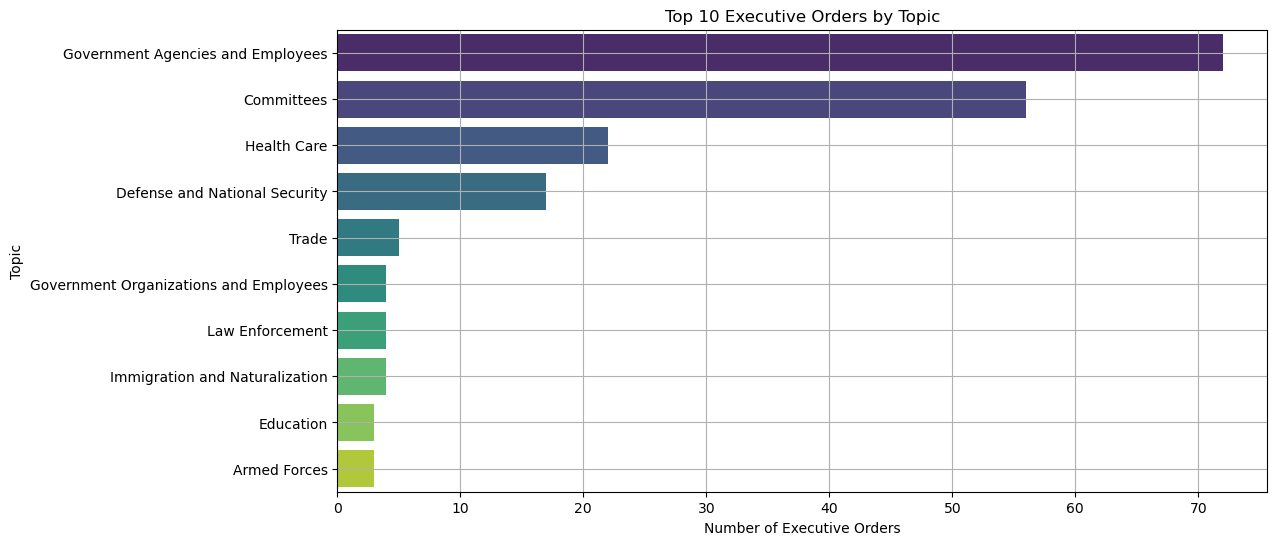

In [56]:
filtered_data = recent_data[recent_data['toc_subject'] != 'Unspecified']

plt.figure(figsize=(12, 6))
topic_counts = filtered_data['toc_subject'].value_counts().head(10)  # Top 10 topics
sns.barplot(x=topic_counts.values, y=topic_counts.index, palette='viridis')
plt.title('Top 10 Executive Orders by Topic')
plt.xlabel('Number of Executive Orders')
plt.ylabel('Topic')
plt.grid(True)
plt.show()

In [63]:
# Define the terms to count with specific conditions
terms_to_count_specific = {
    'artificial intelligence': r'\b[Aa]rtificial [Ii]ntelligence\b',  # Match variations like "artificial intelligence", "Artificial Intelligence"
    'AI': r'\bAI\b'  # Only count the uppercase "AI"
}

# Create a dictionary to store the counts of each term
term_counts_specific = {term: 0 for term in terms_to_count_specific}

# Count occurrences of each term in the cleaned_text column using the specified regular expressions
for term, regex in terms_to_count_specific.items():
    term_counts_specific[term] = recent_data['cleaned_text'].str.count(regex).sum()

# Display the result
print("Occurrences of specific terms (case-specific for 'AI' and case variations for 'artificial intelligence'):")
for term, count in term_counts_specific.items():
    print(f"{term}: {count} times")

Occurrences of specific terms (case-specific for 'AI' and case variations for 'artificial intelligence'):
artificial intelligence: 18 times
AI: 150 times


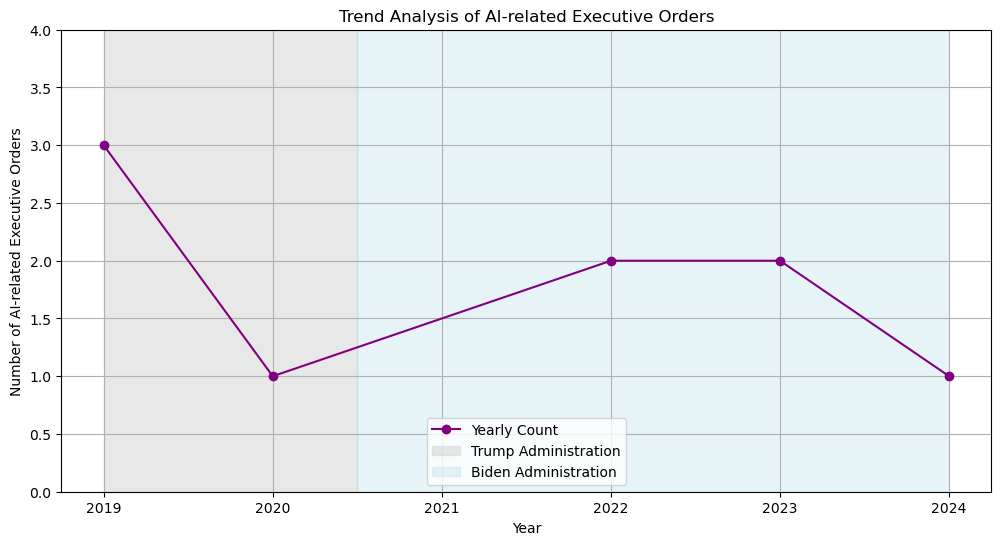

In [93]:
import matplotlib.dates as mdates

# Plotting the enhanced trend of AI-related Executive Orders with highlighted presidencies
plt.figure(figsize=(12, 6))
ai_eo_per_year.plot(kind='line', marker='o', color='purple', label='Yearly Count')

# Customize plot appearance
plt.title('Trend Analysis of AI-related Executive Orders')
plt.xlabel('Year')
plt.ylabel('Number of AI-related Executive Orders')
plt.grid(True)
plt.ylim(0, ai_eo_per_year.max() + 1)

# Highlighting different presidencies
plt.axvspan(2019, 2020.5, color='lightgrey', alpha=0.5, label='Trump Administration')
plt.axvspan(2020.5, 2024, color='lightblue', alpha=0.3, label='Biden Administration')

# Show legend and plot
plt.legend()
plt.show()

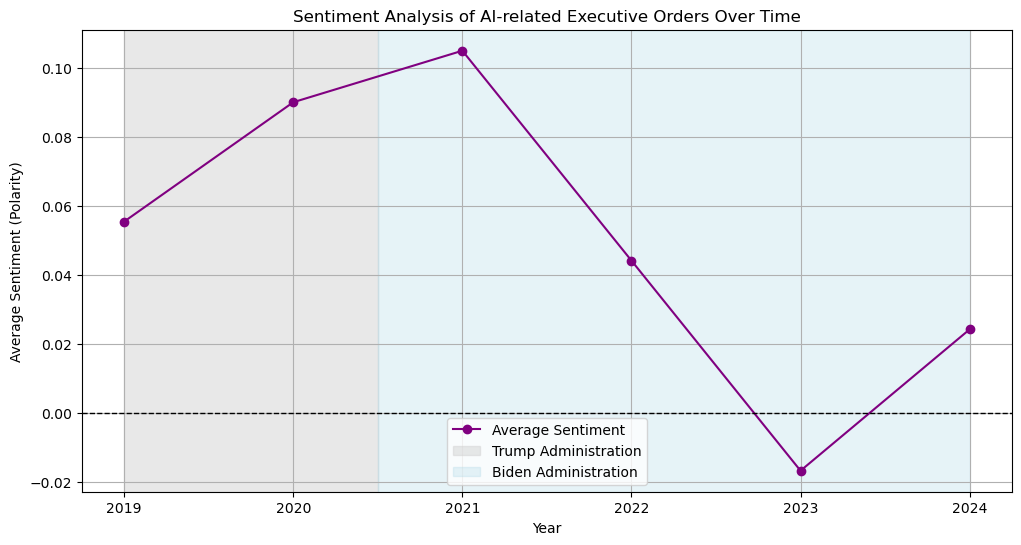

In [95]:
import matplotlib.pyplot as plt
import numpy as np

# Plotting the enhanced sentiment analysis of AI-related Executive Orders with highlighted presidencies
plt.figure(figsize=(12, 6))
ai_sentiment_per_year.plot(kind='line', marker='o', color='purple', label='Average Sentiment')

# Customize plot appearance
plt.title('Sentiment Analysis of AI-related Executive Orders Over Time')
plt.xlabel('Year')
plt.ylabel('Average Sentiment (Polarity)')
plt.grid(True)
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # Draw baseline at y=0

# Highlighting different presidencies
plt.axvspan(2019, 2020.5, color='lightgrey', alpha=0.5, label='Trump Administration')
plt.axvspan(2020.5, 2024, color='lightblue', alpha=0.3, label='Biden Administration')

# Show legend and plot
plt.legend()
plt.show()

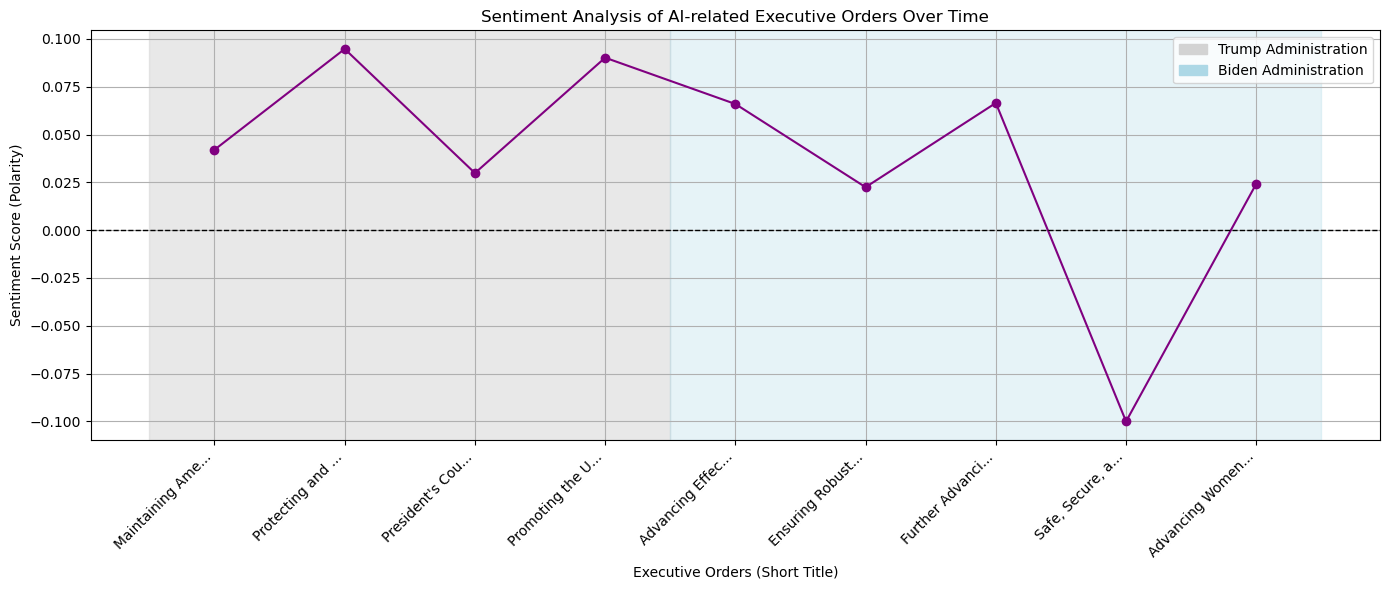

In [121]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure the signing_date column is in datetime format
ai_related_eos_sorted['signing_date'] = pd.to_datetime(ai_related_eos_sorted['signing_date'])

# Determine which president published each executive order
ai_related_eos_sorted['president'] = ai_related_eos_sorted['signing_date'].apply(
    lambda date: 'Trump' if date < pd.to_datetime('2021-01-20') else 'Biden'
)

# Create a short title or abbreviation for each executive order to use on the x-axis
ai_related_eos_sorted['short_title'] = ai_related_eos_sorted['title'].apply(lambda x: x[:15] + '...' if len(x) > 15 else x)

# Plotting each EO in chronological order with titles on the x-axis
plt.figure(figsize=(14, 6))

# Highlighting different presidencies using background color spans
plt.axvspan(-0.5, len(ai_related_eos_sorted[ai_related_eos_sorted['president'] == 'Trump']) - 0.5, 
            color='lightgrey', alpha=0.5, label='Trump Administration')
plt.axvspan(len(ai_related_eos_sorted[ai_related_eos_sorted['president'] == 'Trump']) - 0.5, 
            len(ai_related_eos_sorted) - 0.5, 
            color='lightblue', alpha=0.3, label='Biden Administration')

# Plotting the sentiment scores
plt.plot(ai_related_eos_sorted['short_title'], ai_related_eos_sorted['ai_sentiment'], marker='o', color='purple', linestyle='-')

# Customize plot appearance
plt.title('Sentiment Analysis of AI-related Executive Orders Over Time')
plt.xlabel('Executive Orders (Short Title)')
plt.ylabel('Sentiment Score (Polarity)')
plt.grid(True)
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # Draw baseline at y=0
plt.xticks(rotation=45, ha='right')

# Show legend for presidents
import matplotlib.patches as mpatches
trump_patch = mpatches.Patch(color='lightgrey', label='Trump Administration')
biden_patch = mpatches.Patch(color='lightblue', label='Biden Administration')
plt.legend(handles=[trump_patch, biden_patch])

# Show the plot
plt.tight_layout()
plt.show()

In [87]:
# Re-check AI-related EOs in 2023
ai_eos_2023 = recent_data[(recent_data['year'] == 2023) & (recent_data['ai_related'])]

# Display the count and titles of AI-related EOs in 2023
print(f"Number of AI-related EOs in 2023: {ai_eos_2023.shape[0]}")
print("Titles of AI-related EOs in 2023:")
print(ai_eos_2023['title'].tolist())

Number of AI-related EOs in 2023: 2
Titles of AI-related EOs in 2023:
['Safe, Secure, and Trustworthy Development and Use of Artificial Intelligence', 'Further Advancing Racial Equity and Support for Underserved Communities Through the Federal Government']


In [120]:
# Check sentiment scores in the dataset for verification
print(ai_related_eos_sorted[['title', 'ai_sentiment']])

                                                 title  ai_sentiment
268  Maintaining American Leadership in Artificial ...      0.042048
237  Protecting and Improving Medicare for Our Nati...      0.094748
232  President's Council of Advisors on Science and...      0.029853
167  Promoting the Use of Trustworthy Artificial In...      0.090180
53   Advancing Effective, Accountable Policing and ...      0.065966
44   Ensuring Robust Consideration of Evolving Nati...      0.022475
36   Further Advancing Racial Equity and Support fo...      0.066510
17   Safe, Secure, and Trustworthy Development and ...     -0.100000
7     Advancing Women's Health Research and Innovation      0.024268
